In [57]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### 1. INFORMARSE DEL NEGOCIO

In [ ]:
# Cargar conjunto de datos
data_cash_request = pd.read_csv("./project_dataset/extract - cash request - data analyst.csv")
data_fee = pd.read_csv("./project_dataset/extract - fees - data analyst - .csv")

In [ ]:
# Primeras filas del DataFrame
data_cash_request.head()

In [ ]:
# Información general del DataFrame
data_cash_request.info()

In [ ]:
# Estadísticas descriptivas
data_cash_request.describe()

In [ ]:
# Contar las opciones distintas en la columna 'status'
def count_status_options(df, column_name):
    status_counts = df[column_name].value_counts()
    return status_counts

print(count_status_options(data_cash_request, 'status'))
print(count_status_options(data_cash_request, 'transfer_type'))
print(count_status_options(data_cash_request, 'recovery_status'))

In [ ]:
# Para ver el primer valor no nulo de una columna del df
def first_non_null_value(column):
    return column.dropna().iloc[0]

first_val = first_non_null_value(data_cash_request['reco_creation'])

first_val

### 2. ANALASIS EXPLORATORIO

In [51]:
# i. Tipo de dato y clasificación
data_cash_request['amount'].dtypes

dtype('float64')

In [ ]:
# Clasificación
def clasificacion_tipo(dtypes):
    clasificaciones = {}
    for column, dtype in dtypes.items():
        if np.issubdtype(dtype, np.number):
            clasificaciones[column] = 'nm'  # numérico
        elif dtype == 'object':
            clasificaciones[column] = 'n'   # nominal
        elif dtype == 'int64' and column.lower() == 'indice':
            clasificaciones[column] = 'i'   # índice
        else:
            clasificaciones[column] = 'Desconocido'
    return clasificaciones

clasificacion = clasificacion_tipo(data_cash_request[''].dtypes)
print(clasificacion)

In [54]:
# ii. Estadística descriptiva
estadisticas_descriptivas = data_cash_request['amount'].describe(include='all')
print(estadisticas_descriptivas)

count    23970.000000
mean        82.720818
std         26.528065
min          1.000000
25%         50.000000
50%        100.000000
75%        100.000000
max        200.000000
Name: amount, dtype: float64


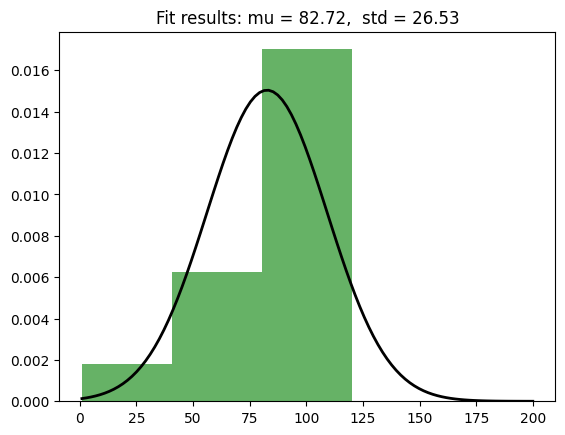

In [58]:
# iii. Funciones de distribución
# Ejemplo con una variable numérica
numerical_data = data_cash_request['amount']

# Calcular y mostrar una distribución normal
mu, std = stats.norm.fit(numerical_data)
xmin, xmax = min(numerical_data), max(numerical_data)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

plt.hist(numerical_data, bins=5, density=True, alpha=0.6, color='g')
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.show()